This notebook will do some basic explorations of the provided training and testing datasets. 

#Import and Directory

In [ ]:
import pandas as pd
import numpy as np
import jax.numpy as jnp
import jax

import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

from sklearn.model_selection import train_test_split
from scipy import sparse

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DSA4212/DSA4212_Assignment2

#Exploration

Read the training and testing datasets into the environment

In [ ]:
train_all = pd.read_csv('assignment_2_ratings_train.csv')

In [ ]:
test = pd.read_csv('assignment_2_ratings_test.csv')

## Train (All) Set

Explore column types, number of rows and first few rows of the data. 

In [ ]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436068 entries, 0 to 4436067
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 101.5 MB


In [ ]:
train_all.shape

(4436068, 3)

In [ ]:
train_all.head(10)

,user_id,anime_id,rating
0,20170,10794,6
1,24592,21995,5
2,18358,7054,10
3,59267,488,7
4,69313,30544,4
5,48301,4720,6
6,39937,27787,7
7,37923,16918,8
8,24516,10893,8
9,61409,986,7


### Users

Number of time each user id appears: 

In [ ]:
train_all['user_id'].value_counts()

user_id
42635      2619
53698      2018
57620      1877
51693      1841
59643      1808
           ... 
67072         1
23455         1
70331         1
23447         1
18594         1
Length: 68421, dtype: int64

There are 68421 distinct users

Number of animes each user has rated, on average:

In [ ]:
np.mean(train_all['user_id'].value_counts())

64.8348898729922

Distribution of the number of movies each user has rated:

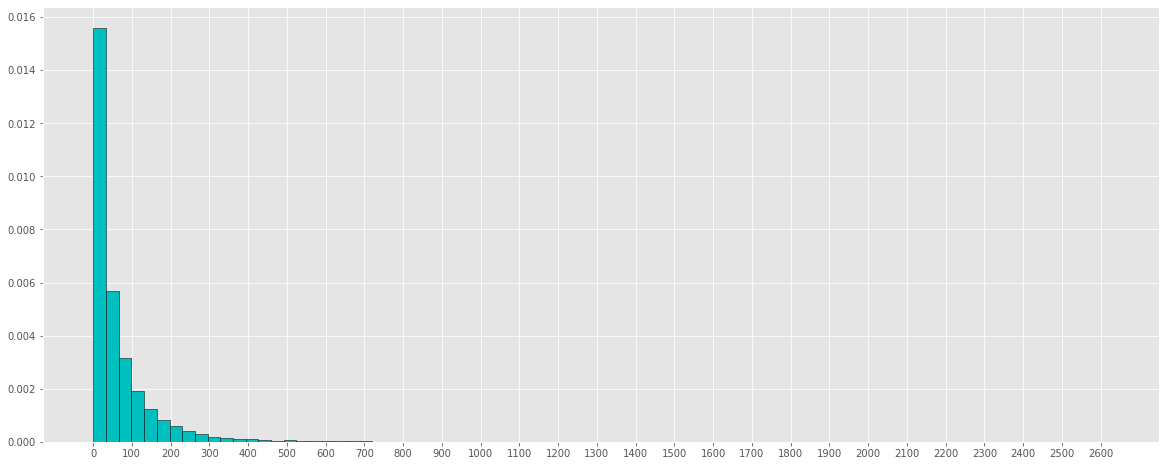

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 8))
_ = plt.hist(train_all['user_id'].value_counts(), bins = 80, density = True, color = 'c', edgecolor = 'k')
_ = plt.xticks(np.arange(0, 2700, step=100))

The distribution is skewed right. Most users have rated less than 100 animes. However, there exist  few users who have rated up to 2600 animes as well.  

### Animes

In [ ]:
train_all['anime_id'].value_counts()

1535     24159
11757    18472
16498    17653
1575     16955
226      16539
         ...  
24237        1
4331         1
24995        1
30065        1
9991         1
Name: anime_id, Length: 9632, dtype: int64

There are 9632 distinct animes

Mean (and median) number or ratings each anime has received. 

In [ ]:
np.mean(train_all['anime_id'].value_counts())

460.55523255813955

On average, each movie has received about 460 ratings.

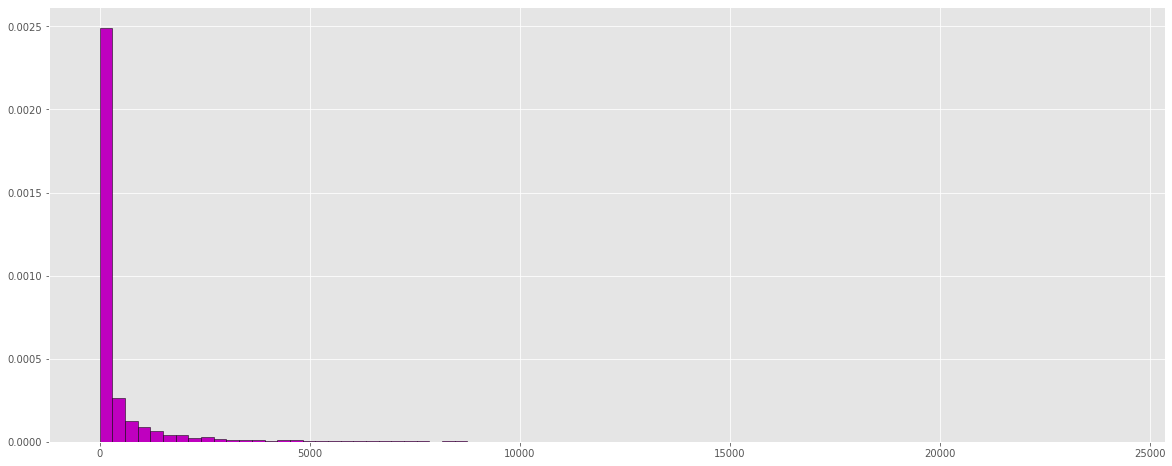

In [ ]:
plt.figure(figsize = (20, 8))
_ = plt.hist(train_all['anime_id'].value_counts(), bins = 80, density = True, color = 'm', edgecolor = 'k')

The distribution of number of ratings each animes received is highly skewed right. Most animes received less than 150 ratings, but animes have received up to 20000 ratings as well. 

### Ratings

The raing of ratings

In [ ]:
train_all['rating'].min(), train_all['rating'].max()      #verify all ratings are between 1-10

(1, 10)

Distribution of ratings

In [ ]:
rating_counts = train_all['rating'].value_counts().rename_axis('rating').reset_index(name='count')
rating_counts

,rating,count
0,8,1152276
1,7,962304
2,9,877737
3,10,669288
4,6,446748
5,5,197810
6,4,73048
7,3,29041
8,2,16192
9,1,11624


All ratings are in integer values

<BarContainer object of 10 artists>

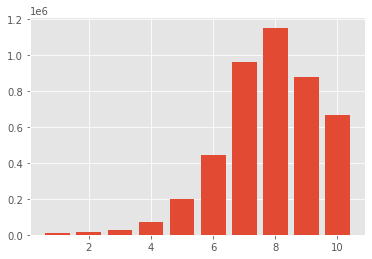

In [ ]:
plt.bar(rating_counts['rating'], rating_counts['count'])

The ratings distribution is skewed left, with most ratings around 7-9

## Test Set

The following check if there how many new IDs that appear for the users and animes in the test set

In [ ]:
test['user_id'].value_counts()

42635    1128
53698     887
59643     824
57620     812
51693     780
         ... 
36158       1
10853       1
21148       1
67201       1
9054        1
Name: user_id, Length: 64627, dtype: int64

The test set also contains some new users as shown below

In [ ]:
new_users = 0
test_users = np.unique(test["user_id"])
train_users = np.unique(train_all["user_id"])
for i in test_users:
  if i not in train_users: 
    new_users+=1

new_users

1179

In [ ]:
test['anime_id'].value_counts()

1535     10067
11757     7838
16498     7637
1575      7171
6547      7068
         ...  
5875         1
32139        1
9781         1
4504         1
9546         1
Name: anime_id, Length: 8840, dtype: int64

There are also a few new anime IDs

In [ ]:
new_anime = 0
test_anime = np.unique(test["anime_id"])
train_anime = np.unique(train_all["anime_id"])
for i in test_anime:
  if i not in train_anime: 
    new_anime+=1

new_anime

295